In [24]:
from __future__ import division
from __future__ import print_function
from jinja2 import Template

import data_tools
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
from decimal import Decimal

import itertools


%matplotlib inline

In [2]:
root_path = '/home/ruffsl/Desktop/bag_final';
bag_folder_names = [
    'ojflo_data',
    'ojflo_occ',
    'ron_data',
    'ron_occ',
    'tide',
    'ojflo_data_svo',
    'ojflo_occ_svo',
    'ron_data_svo',
    'ron_occ_svo',
#     'ojflo_data_particle',
#     'ojflo_occ_particle',
#     'ron_data_particle',
#     'ron_occ_particle',
#     'tide_particle',
    ]

In [3]:
# ! cp bag2file.bash {root_path}
# ! cd {root_path} && ./bag2file.bash

In [4]:
for bag in bag_folder_names:
    print(bag,':')
    folder_path = os.path.join(root_path, bag)
    data_tools.synchronize_Object_TF_Pose(folder_path)

ojflo_data :
	base_df2:  (2454, 8)
	object_df2:  (2454, 8)
ojflo_occ :
	base_df2:  (2457, 8)
	object_df2:  (2457, 8)
ron_data :
	base_df2:  (2376, 8)
	object_df2:  (2376, 8)
ron_occ :
	base_df2:  (2700, 8)
	object_df2:  (2700, 8)
tide :
	base_df2:  (2938, 8)
	object_df2:  (2938, 8)
ojflo_data_svo :
	base_df2:  (2266, 8)
	object_df2:  (2266, 8)
ojflo_occ_svo :
	base_df2:  (1861, 8)
	object_df2:  (1861, 8)
ron_data_svo :
	base_df2:  (2241, 8)
	object_df2:  (2241, 8)
ron_occ_svo :
	base_df2:  (2651, 8)
	object_df2:  (2651, 8)


In [5]:
for bag in bag_folder_names:
    print(bag,':')
    base_poses_path = os.path.join(root_path, bag, 'base_sync.txt')
    object_poses_path = os.path.join(root_path, bag, 'object_sync.txt')
    object_error_path = os.path.join(root_path, bag, 'object_error.txt')
    data_tools.getGlobalErrors(base_poses_path, object_poses_path, object_error_path)

ojflo_data :
ojflo_occ :
ron_data :
ron_occ :
tide :
ojflo_data_svo :
ojflo_occ_svo :
ron_data_svo :
ron_occ_svo :


In [23]:
lol = plt.gcf()
lol.autofmt_xdate()

In [37]:
def read_error(file_path):
    error_df = pd.read_csv(file_path, header=None)
    return error_df

def read_time(file_path):
    time_df = pd.read_csv(file_path, header=None)
    time_s = [datetime.datetime.fromtimestamp(x) for x in time_df[0]]
    time = np.array(time_s) - time_s[0]
    return time

def plot_error(error_df, error_th):
    error_df.plot(ylim=[0, error_th], rot=45)
    ax = plt.gcf()
    ax.autofmt_xdate()
#     error_df.plot()
    
def filter_error(error_df, error_th):
    error_df[(error_df[0]>=error_th)][0] = pd.NaT
    return error_df

def get_ratio(error_df, error_th):
    drops = error_df[0]>=error_th
    return np.sum(drops)/len(drops)

def get_mean(error_df):
    return error_df[0].mean(axis=0)

ojflo_data :
	Ratio:  95.3545232274
	Mean:  1.05501424051


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


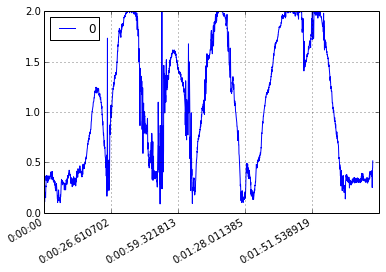

ojflo_occ :
	Ratio:  98.8603988604
	Mean:  0.394490247881


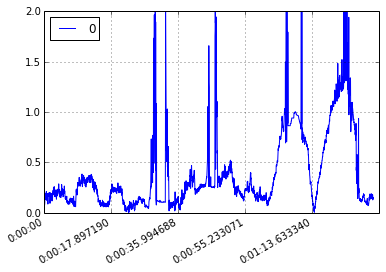

ron_data :
	Ratio:  97.8535353535
	Mean:  0.88037448298


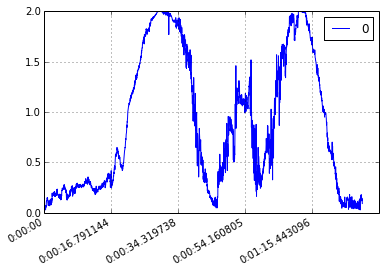

ron_occ :
	Ratio:  99.1481481481
	Mean:  0.445277353815


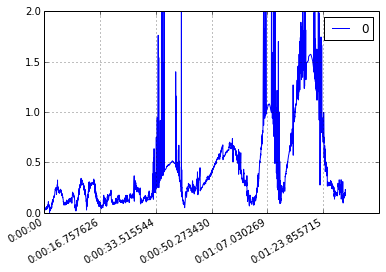

tide :
	Ratio:  94.2137508509
	Mean:  0.986636641796


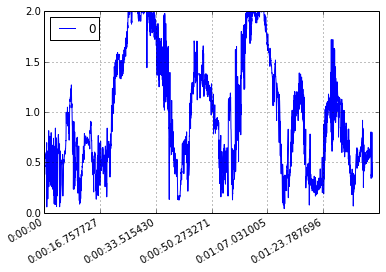

ojflo_data_svo :
	Ratio:  97.3962930274
	Mean:  1.02387069836


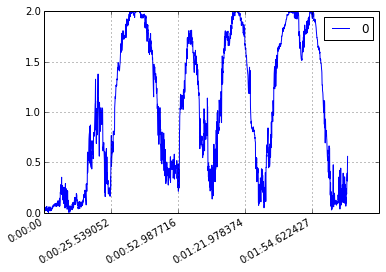

ojflo_occ_svo :
	Ratio:  99.7313272434
	Mean:  0.428036840216


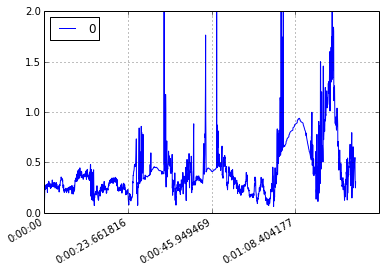

ron_data_svo :
	Ratio:  97.2780008925
	Mean:  0.929945173646


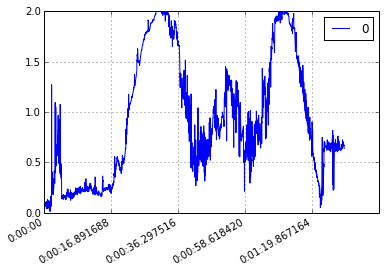

ron_occ_svo :
	Ratio:  98.9815164089
	Mean:  0.452589562753


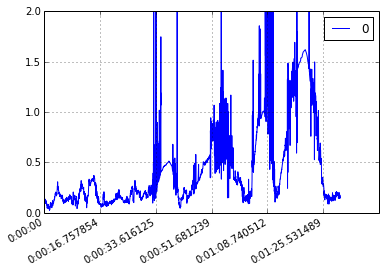

In [38]:
error_th = 2.0

results = {}

for bag in bag_folder_names:
    print(bag,':')
    error_file_path = os.path.join(root_path, bag, 'object_error.txt')
    error_df = read_error(error_file_path)
    object_file_path = os.path.join(root_path, bag, 'object_sync.txt')
    time = read_time(object_file_path)
    error_df = error_df.set_index(time)
    
    ratio = 100 - 100*get_ratio(error_df, error_th)
    print('\tRatio: ', ratio)
    error_df = filter_error(error_df, error_th)
    mean = get_mean(error_df)
    print('\tMean: ', mean)
    plt.figure()
    plot_error(error_df, error_th)
    plt.show()
    bag_results = {'ratio':"{:0.2f}%".format(ratio),
                   'mean':"{:0.3f} m".format(mean)}
    results[bag] = bag_results
    
#     break

In [17]:
results

{'ojflo_data': {'mean': '0.813 m', 'ratio': '99.96%'},
 'ojflo_data_particle': {'mean': '0.934 m', 'ratio': '94.36%'},
 'ojflo_data_svo': {'mean': '0.859 m', 'ratio': '99.87%'},
 'ojflo_occ': {'mean': '0.327 m', 'ratio': '99.51%'},
 'ojflo_occ_particle': {'mean': '0.301 m', 'ratio': '99.30%'},
 'ojflo_occ_svo': {'mean': '0.373 m', 'ratio': '100.00%'},
 'ron_data': {'mean': '0.763 m', 'ratio': '99.96%'},
 'ron_data_particle': {'mean': '0.658 m', 'ratio': '99.08%'},
 'ron_data_svo': {'mean': '0.792 m', 'ratio': '97.27%'},
 'ron_occ': {'mean': '0.199 m', 'ratio': '99.85%'},
 'ron_occ_particle': {'mean': '0.226 m', 'ratio': '98.85%'},
 'ron_occ_svo': {'mean': '0.196 m', 'ratio': '100.00%'},
 'tide': {'mean': '0.696 m', 'ratio': '100.00%'},
 'tide_particle': {'mean': '0.626 m', 'ratio': '97.90%'}}

In [18]:
template = data_tools.texenv.get_template('template.tex')
output = template.render(results=results)
print(output)

% Please add the following required packages to your document preamble:
% \usepackage{multirow}
\begin{table}[]
\centering
\caption{My caption}
\label{my-label}
\begin{tabular}{lllll}
\hline
                           &                            & \multicolumn{3}{c}{Methods}                                                                                                                                                                                                           \\ \hline
                           &                            & SVO                                                                        & Particle                                                                        & Approach                                                               \\ \hline
\multirow{2}{*}{ojflo}     & \multicolumn{1}{l|}{mean}  & \multicolumn{1}{l|}{0.859 m}  & \multicolumn{1}{l|}{0.934 m}  & \multicolumn{1}{l|}{0.813 m}  \\ \cline{2-5}
                           & \multicolumn{1}{l